In [1]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable


In [1]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import f_regression

# Load data
df = pd.read_csv('SuperStore_Orders.csv', encoding='cp1252')
print(df.dtypes)

order_id           object
order_date         object
ship_date          object
ship_mode          object
customer_name      object
segment            object
state              object
country            object
market             object
region             object
product_id         object
category           object
sub_category       object
product_name       object
sales              object
quantity            int64
discount          float64
profit            float64
shipping_cost     float64
order_priority     object
year                int64
dtype: object


In [3]:
df

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,01-01-2011,06-01-2011,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408,2,0.0,106.1400,35.46,Medium,2011
1,IN-2011-47883,01-01-2011,08-01-2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120,3,0.1,36.0360,9.72,Medium,2011
2,HU-2011-1220,01-01-2011,05-01-2011,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66,4,0.0,29.6400,8.17,High,2011
3,IT-2011-3647632,01-01-2011,05-01-2011,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",45,3,0.5,-26.0550,4.82,High,2011
4,IN-2011-47883,01-01-2011,08-01-2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",114,5,0.1,37.7700,4.70,Medium,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,CA-2014-115427,31-12-2014,04-01-2015,Standard Class,Erica Bern,Corporate,California,United States,US,West,...,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",14,2,0.2,4.5188,0.89,Medium,2014
51286,MO-2014-2560,31-12-2014,05-01-2015,Standard Class,Liz Preis,Consumer,Souss-Massa-Draâ,Morocco,Africa,Africa,...,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",4,1,0.0,0.4200,0.49,Medium,2014
51287,MX-2014-110527,31-12-2014,02-01-2015,Second Class,Charlotte Melton,Consumer,Managua,Nicaragua,LATAM,Central,...,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26,3,0.0,12.3600,0.35,Medium,2014
51288,MX-2014-114783,31-12-2014,06-01-2015,Standard Class,Tamara Dahlen,Consumer,Chihuahua,Mexico,LATAM,North,...,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7,1,0.0,0.5600,0.20,Medium,2014


In [4]:
# Mengubah kolom sales dari string ke integer
df['sales'] = df['sales'].str.replace(',', '') 
df['sales'] = df['sales'].astype(int)

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   order_id        51290 non-null  object 
 1   order_date      51290 non-null  object 
 2   ship_date       51290 non-null  object 
 3   ship_mode       51290 non-null  object 
 4   customer_name   51290 non-null  object 
 5   segment         51290 non-null  object 
 6   state           51290 non-null  object 
 7   country         51290 non-null  object 
 8   market          51290 non-null  object 
 9   region          51290 non-null  object 
 10  product_id      51290 non-null  object 
 11  category        51290 non-null  object 
 12  sub_category    51290 non-null  object 
 13  product_name    51290 non-null  object 
 14  sales           51290 non-null  int64  
 15  quantity        51290 non-null  int64  
 16  discount        51290 non-null  float64
 17  profit          51290 non-null 

In [6]:
df.describe()

,sales,quantity,discount,profit,shipping_cost,year
count,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,246.498440,3.476545,0.142908,28.641740,26.375915,2012.777208
std,487.567175,2.278766,0.212280,174.424113,57.296804,1.098931
min,0.000000,1.000000,0.000000,-6599.978000,0.000000,2011.000000
25%,31.000000,2.000000,0.000000,0.000000,2.610000,2012.000000
50%,85.000000,3.000000,0.000000,9.240000,7.790000,2013.000000
75%,251.000000,5.000000,0.200000,36.810000,24.450000,2014.000000
max,22638.000000,14.000000,0.850000,8399.976000,933.570000,2014.000000


In [ ]:
# Drop kolom yang ingin dihapus
drop_col = ['order_id', 'order_date', 'ship_date', 'customer_name', 'product_id', 'product_name']
# Drop kolom dari DataFrame
df.drop(columns=drop_col, inplace=True)

In [7]:
df

,ship_mode,segment,state,country,market,region,category,sub_category,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,Standard Class,Consumer,Constantine,Algeria,Africa,Africa,Office Supplies,Storage,408,2,0.0,106.1400,35.46,Medium,2011
1,Standard Class,Consumer,New South Wales,Australia,APAC,Oceania,Office Supplies,Supplies,120,3,0.1,36.0360,9.72,Medium,2011
2,Second Class,Consumer,Budapest,Hungary,EMEA,EMEA,Office Supplies,Storage,66,4,0.0,29.6400,8.17,High,2011
3,Second Class,Home Office,Stockholm,Sweden,EU,North,Office Supplies,Paper,45,3,0.5,-26.0550,4.82,High,2011
4,Standard Class,Consumer,New South Wales,Australia,APAC,Oceania,Furniture,Furnishings,114,5,0.1,37.7700,4.70,Medium,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,Standard Class,Corporate,California,United States,US,West,Office Supplies,Binders,14,2,0.2,4.5188,0.89,Medium,2014
51286,Standard Class,Consumer,Souss-Massa-Draâ,Morocco,Africa,Africa,Office Supplies,Binders,4,1,0.0,0.4200,0.49,Medium,2014
51287,Second Class,Consumer,Managua,Nicaragua,LATAM,Central,Office Supplies,Labels,26,3,0.0,12.3600,0.35,Medium,2014
51288,Standard Class,Consumer,Chihuahua,Mexico,LATAM,North,Office Supplies,Labels,7,1,0.0,0.5600,0.20,Medium,2014


##### 🌺Feature Selection (One Way ANOVA)

In [8]:
# Melakukan uji One-Way ANOVA untuk setiap kolom kategorikal 
for col in df.columns:
    if df[col].dtype == 'object' or df[col].dtype.name == 'category':
        model_1way = ols(f'sales ~ C({col})', data=df).fit()
        anova_1way = sm.stats.anova_lm(model_1way, typ=2)
        pd.options.display.float_format = '{:.6e}'.format
        print(f"{col} One-Way ANOVA:\n", anova_1way)
print("")

ship_mode One-Way ANOVA:
                    sum_sq           df            F       PR(>F)
C(ship_mode) 1.086656e+05 3.000000e+00 1.523633e-01 9.282117e-01
Residual     1.219240e+10 5.128600e+04          NaN          NaN
segment One-Way ANOVA:
                  sum_sq           df            F       PR(>F)
C(segment) 6.596024e+04 2.000000e+00 1.387295e-01 8.704638e-01
Residual   1.219244e+10 5.128700e+04          NaN          NaN
state One-Way ANOVA:
                sum_sq           df            F       PR(>F)
C(state) 5.044572e+08 1.093000e+03 1.982125e+00 8.717133e-71
Residual 1.168805e+10 5.019600e+04          NaN          NaN
country One-Way ANOVA:
                  sum_sq           df            F        PR(>F)
C(country) 2.915073e+08 1.460000e+02 8.580236e+00 1.512257e-172
Residual   1.190100e+10 5.114300e+04          NaN           NaN
market One-Way ANOVA:
                 sum_sq           df            F        PR(>F)
C(market) 1.736551e+08 6.000000e+00 1.234942e+02 1.200073e-

In [10]:
# Membuat df baru dgn target sales 
df_all = df[['state','ship_mode', 'segment', 'country', 'market', 'region', 'category', 'sub_category', 'order_priority','quantity','discount','shipping_cost','sales','profit']]
df_all

,state,ship_mode,segment,country,market,region,category,sub_category,order_priority,quantity,discount,shipping_cost,sales,profit
0,Constantine,Standard Class,Consumer,Algeria,Africa,Africa,Office Supplies,Storage,Medium,2,0.0,35.46,408,106.1400
1,New South Wales,Standard Class,Consumer,Australia,APAC,Oceania,Office Supplies,Supplies,Medium,3,0.1,9.72,120,36.0360
2,Budapest,Second Class,Consumer,Hungary,EMEA,EMEA,Office Supplies,Storage,High,4,0.0,8.17,66,29.6400
3,Stockholm,Second Class,Home Office,Sweden,EU,North,Office Supplies,Paper,High,3,0.5,4.82,45,-26.0550
4,New South Wales,Standard Class,Consumer,Australia,APAC,Oceania,Furniture,Furnishings,Medium,5,0.1,4.70,114,37.7700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,California,Standard Class,Corporate,United States,US,West,Office Supplies,Binders,Medium,2,0.2,0.89,14,4.5188
51286,Souss-Massa-Draâ,Standard Class,Consumer,Morocco,Africa,Africa,Office Supplies,Binders,Medium,1,0.0,0.49,4,0.4200
51287,Managua,Second Class,Consumer,Nicaragua,LATAM,Central,Office Supplies,Labels,Medium,3,0.0,0.35,26,12.3600
51288,Chihuahua,Standard Class,Consumer,Mexico,LATAM,North,Office Supplies,Labels,Medium,1,0.0,0.20,7,0.5600


##### 🌺XGBoost

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from scipy.stats import f_oneway

# Set target ke
y = df_all['sales']

# Ambil semua fitur kategorikal dan numerikal (kecuali target)
categorical_cols = df_all.drop(columns='sales').select_dtypes(include=['object', 'category']).columns.tolist()
numerical_cols = df_all.drop(columns='sales').select_dtypes(include=['int64', 'float64']).columns.tolist()

# ANOVA untuk seleksi fitur kategorikal
selected_cols = []
for col in categorical_cols:
    groups = [group['sales'].dropna() for name, group in df_all.groupby(col)]
    if len(groups) > 1:
        f_stat, p_val = f_oneway(*groups)
        if p_val < 0.05:
            selected_cols.append(col)

print("Fitur hasil ANOVA:", selected_cols)

# One-hot encoding untuk fitur terpilih
X_cat_encoded = pd.get_dummies(df_all[selected_cols], drop_first=True)

# Gabungkan dengan fitur numerik
X_all = pd.concat([X_cat_encoded, df_all[numerical_cols]], axis=1)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_all, y, test_size=0.2, random_state=42)


# XGBoost Model
model = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)

model.fit(X_train,y_train)

Fitur hasil ANOVA: ['state', 'country', 'market', 'region', 'category', 'sub_category']


,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from collections import defaultdict
import numpy as np
import pandas as pd
import xgboost as xgb

# Prediksi menggunakan model XGBoost
y_pred = model.predict(X_test)

# Evaluasi model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mean_sales = y_test.mean()
rmse_percentage = (rmse / mean_sales) * 100

print(f"R² Score: {r2:.4f}")
print(f"RMSE: {rmse:.2f}")
print(f"Persentase Error: {rmse_percentage:.2f}% dari rata-rata penjualan")


R² Score: 0.7831
RMSE: 230.34
Persentase Error: 92.67% dari rata-rata penjualan


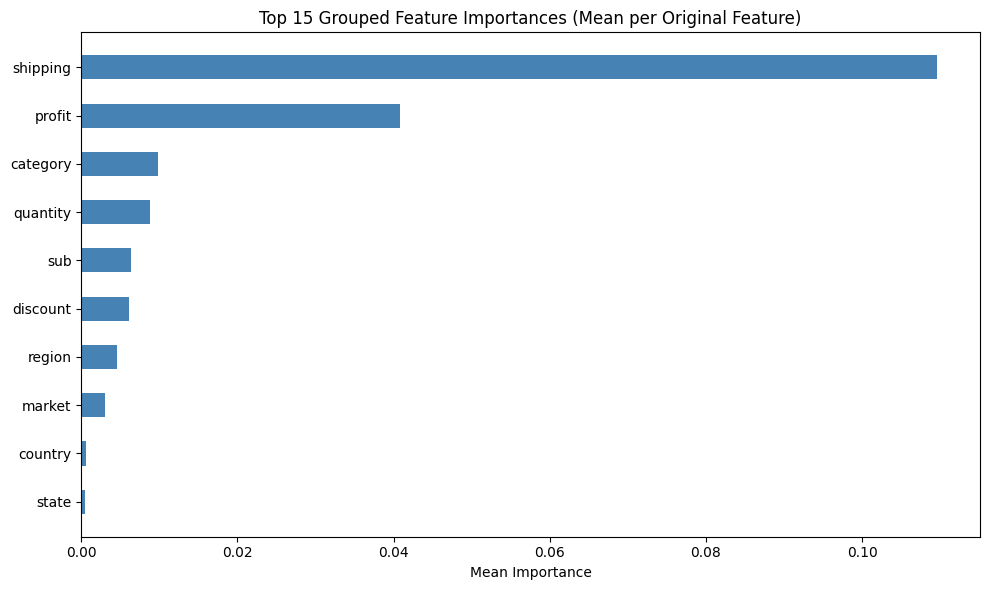

In [ ]:
# Ambil feature importances dan nama kolom hasil one-hot encoding
importances = model.feature_importances_
feature_names = X_train.columns

# Kelompokkan berdasarkan nama variabel asli (misalnya 'state_CA' → 'state')
grouped_importances = defaultdict(list)

for feat, imp in zip(feature_names, importances):
    base_feat = feat.split('_')[0]
    grouped_importances[base_feat].append(imp)

# Hitung rata-rata importance per variabel asli
grouped_df = pd.DataFrame({
    'Feature': list(grouped_importances.keys()),
    'Importance': [np.mean(imps) for imps in grouped_importances.values()]
})

# Ambil 15 variabel paling penting
grouped_df = grouped_df.sort_values(by='Importance', ascending=False).head(15)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(grouped_df['Feature'][::-1], grouped_df['Importance'][::-1], height=0.5, color='steelblue')
plt.title("Top 15 Grouped Feature Importances (Mean per Original Feature)")
plt.xlabel("Mean Importance")
plt.tight_layout()
plt.show()


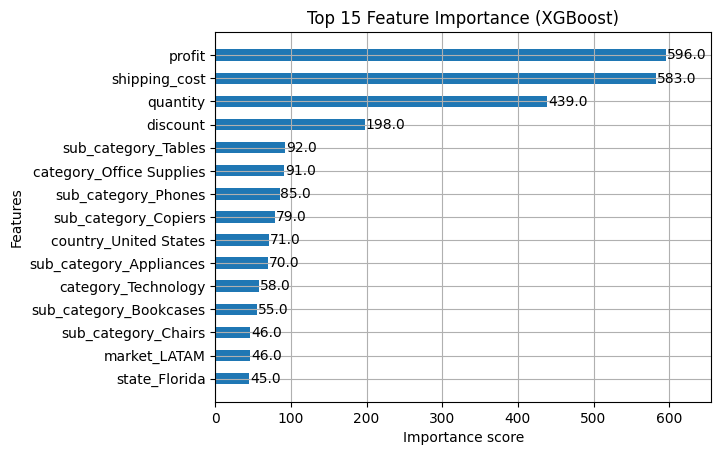

In [16]:
# Menampilkan grafik feature importance dari model XGBoost 
import matplotlib.pyplot as plt

xgb.plot_importance(model, max_num_features=15, height=0.5)
plt.title("Top 15 Feature Importance (XGBoost)")
plt.show()

##### 🌺Linear Regression

In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import f_oneway
import matplotlib.pyplot as plt
from collections import defaultdict

In [25]:
# Target variabel
y = df_all['sales']

# Identifikasi fitur kategorikal & numerik
categorical_cols = df_all.drop(columns='sales').select_dtypes(include=['object', 'category']).columns.tolist()
numerical_cols = df_all.drop(columns='sales').select_dtypes(include=['int64', 'float64']).columns.tolist()

# Seleksi fitur kategorikal pakai ANOVA
selected_cols = []
for col in categorical_cols:
    groups = [group['sales'].dropna() for name, group in df_all.groupby(col)]
    if len(groups) > 1:
        f_stat, p_val = f_oneway(*groups)
        if p_val < 0.05:
            selected_cols.append(col)

print("Fitur hasil ANOVA:", selected_cols)

# One-hot encoding fitur kategorikal terpilih
X_cat_encoded = pd.get_dummies(df_all[selected_cols], drop_first=True)

# Gabung dengan fitur numerik
X_all = pd.concat([X_cat_encoded, df_all[numerical_cols]], axis=1)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_all, y, test_size=0.2, random_state=42)


Fitur hasil ANOVA: ['state', 'country', 'market', 'region', 'category', 'sub_category']


In [26]:
# Buat model
model = LinearRegression(n_jobs=-1)

# Latih model
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,-1
,positive,False


In [27]:
# Prediksi
y_pred = model.predict(X_test)

# Evaluasi
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mean_sales = y_test.mean()
rmse_percentage = (rmse / mean_sales) * 100

# Cetak hasil
print(f"R² Score: {r2:.4f}")
print(f"RMSE: {rmse:.2f}")
print(f"Persentase Error: {rmse_percentage:.2f}% dari rata-rata penjualan")

R² Score: 0.7183
RMSE: 262.52
Persentase Error: 105.62% dari rata-rata penjualan


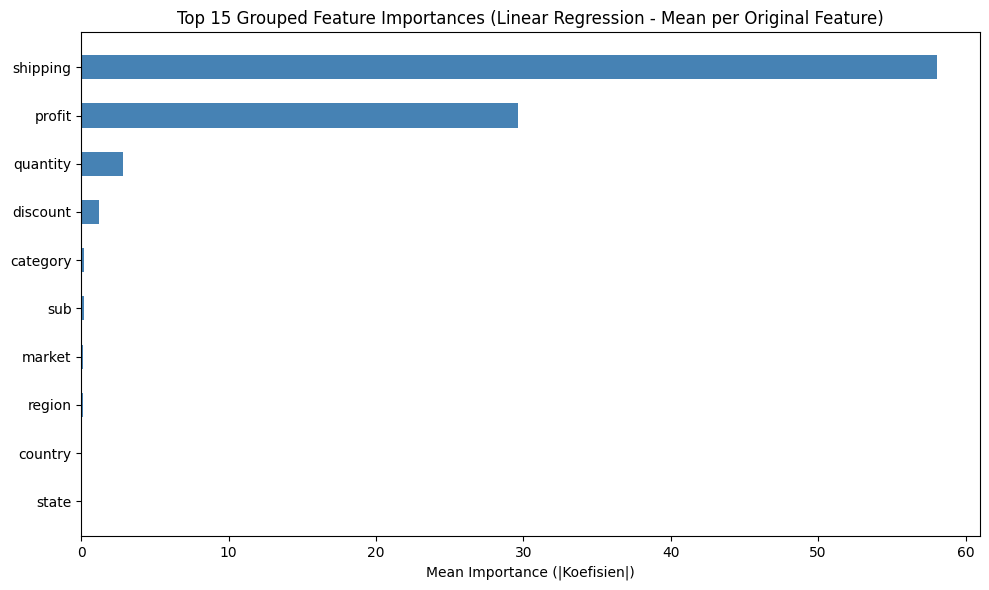

In [28]:
# Kelompokkan berdasarkan nama variabel asli
grouped_importances = defaultdict(list)

for feat, imp in zip(feature_names, importances):
    base_feat = feat.split('_')[0]
    grouped_importances[base_feat].append(imp)

# Buat DataFrame hasil rata-rata
grouped_df = pd.DataFrame({
    'Feature': list(grouped_importances.keys()),
    'Importance': [np.mean(imps) for imps in grouped_importances.values()]
}).sort_values(by='Importance', ascending=False).head(15)

# Visualisasi
plt.figure(figsize=(10, 6))
plt.barh(grouped_df['Feature'][::-1], grouped_df['Importance'][::-1] * 100, height=0.5, color='steelblue')
plt.title("Top 15 Grouped Feature Importances (Linear Regression - Mean per Original Feature)")
plt.xlabel("Mean Importance (|Koefisien|)")
plt.tight_layout()
plt.show()

##### 🌺Random Forest

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import f_oneway
import matplotlib.pyplot as plt
from collections import defaultdict

In [11]:
# Target
y = df_all['sales']

# Identifikasi fitur
categorical_cols = df_all.drop(columns='sales').select_dtypes(include=['object', 'category']).columns.tolist()
numerical_cols = df_all.drop(columns='sales').select_dtypes(include=['int64', 'float64']).columns.tolist()

# ANOVA seleksi fitur kategorikal
selected_cols = []
for col in categorical_cols:
    groups = [group['sales'].dropna() for name, group in df_all.groupby(col)]
    if len(groups) > 1:
        f_stat, p_val = f_oneway(*groups)
        if p_val < 0.05:
            selected_cols.append(col)

print("Fitur hasil ANOVA:", selected_cols)

# One-hot encoding untuk fitur kategorikal terpilih
X_cat_encoded = pd.get_dummies(df_all[selected_cols], drop_first=True)

# Gabung dengan fitur numerik
X_all = pd.concat([X_cat_encoded, df_all[numerical_cols]], axis=1)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_all, y, test_size=0.2, random_state=42)


Fitur hasil ANOVA: ['state', 'country', 'market', 'region', 'category', 'sub_category']


In [12]:
# Buat dan latih model
model_rf = RandomForestRegressor(
    n_estimators=100,
    max_depth=6,
    random_state=42,
    n_jobs=-1
)

model_rf.fit(X_train, y_train)


,n_estimators,100
,criterion,'squared_error'
,max_depth,6
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [13]:
# Prediksi
y_pred = model_rf.predict(X_test)

# Evaluasi
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mean_sales = y_test.mean()
rmse_percentage = (rmse / mean_sales) * 100

# Cetak hasil
print(f"R² Score: {r2:.4f}")
print(f"RMSE: {rmse:.2f}")
print(f"Persentase Error: {rmse_percentage:.2f}% dari rata-rata penjualan")


R² Score: 0.7403
RMSE: 252.07
Persentase Error: 101.41% dari rata-rata penjualan


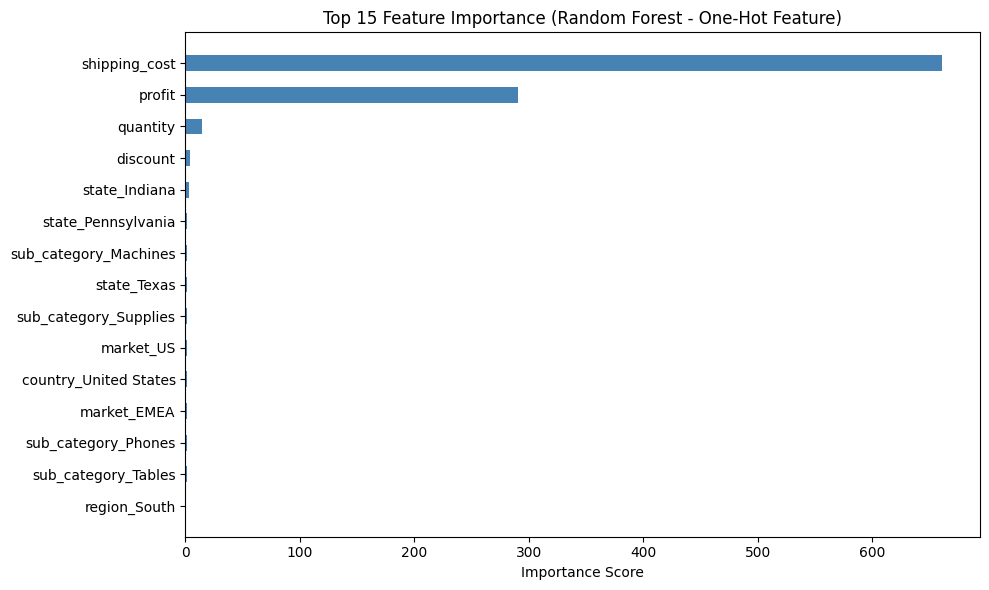

In [14]:
# Ambil feature importance
importances = model_rf.feature_importances_
feature_names = X_train.columns

# Buat DataFrame untuk top 15 fitur
feat_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False).head(15)

# Visualisasi
plt.figure(figsize=(10, 6))
plt.barh(feat_df['Feature'][::-1], feat_df['Importance'][::-1] * 1000, height=0.5, color='steelblue')
plt.title("Top 15 Feature Importance (Random Forest - One-Hot Feature)")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()


##### 🌺Decision Tree

In [31]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import f_oneway
import matplotlib.pyplot as plt
from collections import defaultdict

In [32]:
# Set target
y = df_all['sales']

# Identifikasi fitur kategorikal dan numerik
categorical_cols = df_all.drop(columns='sales').select_dtypes(include=['object', 'category']).columns.tolist()
numerical_cols = df_all.drop(columns='sales').select_dtypes(include=['int64', 'float64']).columns.tolist()

# ANOVA untuk seleksi fitur kategorikal
selected_cols = []
for col in categorical_cols:
    groups = [group['sales'].dropna() for name, group in df_all.groupby(col)]
    if len(groups) > 1:
        f_stat, p_val = f_oneway(*groups)
        if p_val < 0.05:
            selected_cols.append(col)

print("Fitur hasil ANOVA:", selected_cols)

# One-hot encoding fitur terpilih
X_cat_encoded = pd.get_dummies(df_all[selected_cols], drop_first=True)

# Gabungkan dengan fitur numerik
X_all = pd.concat([X_cat_encoded, df_all[numerical_cols]], axis=1)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_all, y, test_size=0.2, random_state=42)


Fitur hasil ANOVA: ['state', 'country', 'market', 'region', 'category', 'sub_category']


In [33]:
# Inisialisasi dan latih model Decision Tree
model_dt = DecisionTreeRegressor(
    max_depth=6,         # boleh disesuaikan
    random_state=42
)

model_dt.fit(X_train, y_train)


,criterion,'squared_error'
,splitter,'best'
,max_depth,6
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [34]:
# Prediksi
y_pred = model_dt.predict(X_test)

# Hitung metrik evaluasi
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mean_sales = y_test.mean()
rmse_percentage = (rmse / mean_sales) * 100

# Cetak hasil
print(f"R² Score: {r2:.4f}")
print(f"RMSE: {rmse:.2f}")
print(f"Persentase Error: {rmse_percentage:.2f}% dari rata-rata penjualan")


R² Score: 0.5872
RMSE: 317.80
Persentase Error: 127.86% dari rata-rata penjualan


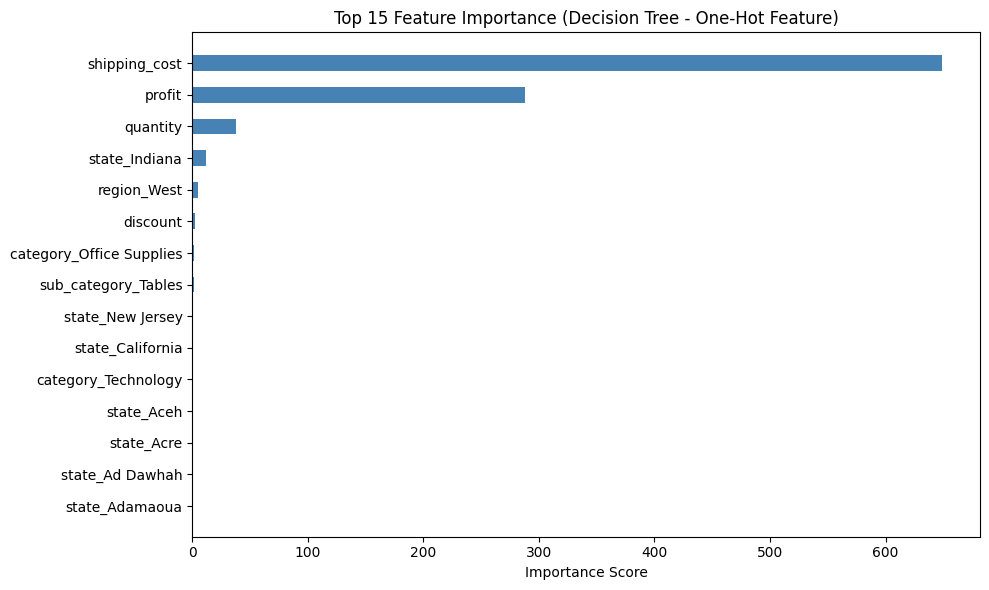

In [36]:
# Ambil feature importance per one-hot feature
importances = model_dt.feature_importances_
feature_names = X_train.columns

# Top 15 fitur
feat_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False).head(15)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(feat_df['Feature'][::-1], feat_df['Importance'][::-1] * 1000, height=0.5, color='steelblue')
plt.title("Top 15 Feature Importance (Decision Tree - One-Hot Feature)")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()


##### 🌺Support Vector Regression

In [37]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import f_oneway
import matplotlib.pyplot as plt
from collections import defaultdict

In [38]:
# Target
y = df_all['sales']

# Fitur kategorikal & numerik (kecuali target)
categorical_cols = df_all.drop(columns='sales').select_dtypes(include=['object', 'category']).columns.tolist()
numerical_cols = df_all.drop(columns='sales').select_dtypes(include=['int64', 'float64']).columns.tolist()

# ANOVA untuk seleksi fitur kategorikal
selected_cols = []
for col in categorical_cols:
    groups = [group['sales'].dropna() for name, group in df_all.groupby(col)]
    if len(groups) > 1:
        f_stat, p_val = f_oneway(*groups)
        if p_val < 0.05:
            selected_cols.append(col)

print("Fitur hasil ANOVA:", selected_cols)

# One-hot encoding
X_cat_encoded = pd.get_dummies(df_all[selected_cols], drop_first=True)

# Gabungkan dengan fitur numerik
X_all = pd.concat([X_cat_encoded, df_all[numerical_cols]], axis=1)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_all, y, test_size=0.2, random_state=42)


Fitur hasil ANOVA: ['state', 'country', 'market', 'region', 'category', 'sub_category']


In [ ]:
# Buat model SVR dengan kernel linear agar bisa melihat koefisien
model_svr = SVR(kernel='linear', C=1.0, epsilon=0.1)

# Latih model
model_svr.fit(X_train, y_train)

In [ ]:
# Prediksi
y_pred = model_svr.predict(X_test)

# Evaluasi
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mean_sales = y_test.mean()
rmse_percentage = (rmse / mean_sales) * 100

# Cetak hasil
print(f"R² Score: {r2:.4f}")
print(f"RMSE: {rmse:.2f}")
print(f"Persentase Error: {rmse_percentage:.2f}% dari rata-rata penjualan")


In [ ]:
# Ambil nilai absolut dari koefisien sebagai importance
importances = np.abs(model_svr.coef_.flatten())
feature_names = X_train.columns

# Buat DataFrame top 15
feat_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False).head(15)

# Visualisasi
plt.figure(figsize=(10, 6))
plt.barh(feat_df['Feature'][::-1], feat_df['Importance'][::-1] * 100, height=0.5, color='teal')
plt.title("Top 15 Feature Importance (SVR - One-Hot Feature)")
plt.xlabel("Importance Score (|Koefisien|)")
plt.tight_layout()
plt.show()

In [ ]:
# Kelompokkan berdasarkan nama variabel asli
grouped_importances = defaultdict(list)
for feat, imp in zip(feature_names, importances):
    base_feat = feat.split('_')[0]
    grouped_importances[base_feat].append(imp)

# Buat DataFrame hasil rata-rata
grouped_df = pd.DataFrame({
    'Feature': list(grouped_importances.keys()),
    'Importance': [np.mean(imps) for imps in grouped_importances.values()]
}).sort_values(by='Importance', ascending=False).head(15)

# Visualisasi
plt.figure(figsize=(10, 6))
plt.barh(grouped_df['Feature'][::-1], grouped_df['Importance'][::-1] * 100, height=0.5, color='darkcyan')
plt.title("Top 15 Grouped Feature Importances (SVR - Mean per Original Feature)")
plt.xlabel("Mean Importance (|Koefisien|)")
plt.tight_layout()
plt.show()


##### 🌺Gradient Boosting Regressor

In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import f_oneway
import matplotlib.pyplot as plt
from collections import defaultdict

In [16]:
# Target
y = df_all['sales']

# Ambil fitur kategorikal dan numerik
categorical_cols = df_all.drop(columns='sales').select_dtypes(include=['object', 'category']).columns.tolist()
numerical_cols = df_all.drop(columns='sales').select_dtypes(include=['int64', 'float64']).columns.tolist()

# ANOVA untuk seleksi fitur kategorikal
selected_cols = []
for col in categorical_cols:
    groups = [group['sales'].dropna() for name, group in df_all.groupby(col)]
    if len(groups) > 1:
        f_stat, p_val = f_oneway(*groups)
        if p_val < 0.05:
            selected_cols.append(col)

print("Fitur hasil ANOVA:", selected_cols)

# One-hot encoding fitur terpilih
X_cat_encoded = pd.get_dummies(df_all[selected_cols], drop_first=True)

# Gabungkan dengan fitur numerik
X_all = pd.concat([X_cat_encoded, df_all[numerical_cols]], axis=1)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_all, y, test_size=0.2, random_state=42)


Fitur hasil ANOVA: ['state', 'country', 'market', 'region', 'category', 'sub_category']


In [17]:
# Buat model Gradient Boosting
model_gb = GradientBoostingRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    random_state=42
)

# Latih model
model_gb.fit(X_train, y_train)


,loss,'squared_error'
,learning_rate,0.1
,n_estimators,100
,subsample,0.8
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,6
,min_impurity_decrease,0.0
,init,None


In [18]:
# Prediksi
y_pred = model_gb.predict(X_test)

# Evaluasi
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mean_sales = y_test.mean()
rmse_percentage = (rmse / mean_sales) * 100

# Cetak hasil
print(f"R² Score: {r2:.4f}")
print(f"RMSE: {rmse:.2f}")
print(f"Persentase Error: {rmse_percentage:.2f}% dari rata-rata penjualan")

R² Score: 0.8083
RMSE: 216.55
Persentase Error: 87.12% dari rata-rata penjualan


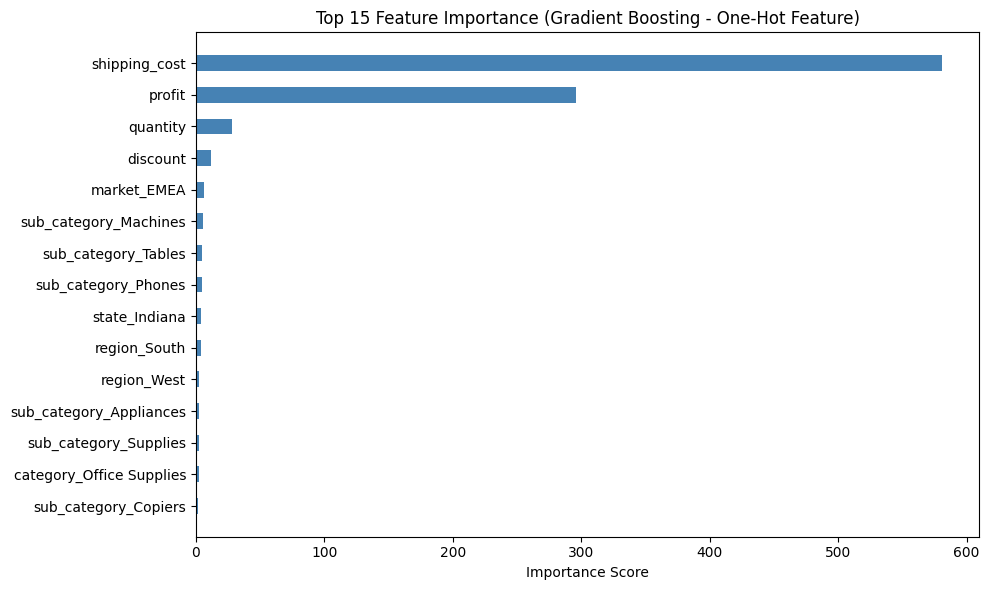

In [22]:
# Ambil feature importance
importances = model_gb.feature_importances_
feature_names = X_train.columns

# Buat DataFrame top 15
feat_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False).head(15)

# Visualisasi
plt.figure(figsize=(10, 6))
plt.barh(feat_df['Feature'][::-1], feat_df['Importance'][::-1] * 1000, height=0.5, color='steelblue')
plt.title("Top 15 Feature Importance (Gradient Boosting - One-Hot Feature)")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()

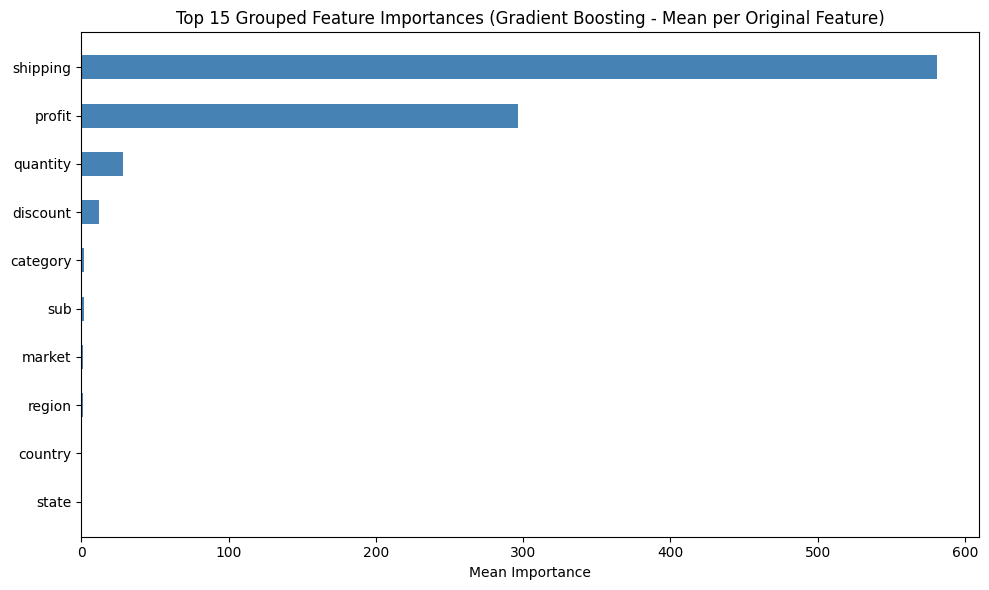

In [23]:
# Kelompokkan berdasarkan variabel asli
grouped_importances = defaultdict(list)
for feat, imp in zip(feature_names, importances):
    base_feat = feat.split('_')[0]
    grouped_importances[base_feat].append(imp)

# Buat DataFrame hasil rata-rata
grouped_df = pd.DataFrame({
    'Feature': list(grouped_importances.keys()),
    'Importance': [np.mean(imps) for imps in grouped_importances.values()]
}).sort_values(by='Importance', ascending=False).head(15)

# Plot grouped importance
plt.figure(figsize=(10, 6))
plt.barh(grouped_df['Feature'][::-1], grouped_df['Importance'][::-1] * 1000, height=0.5, color='steelblue')
plt.title("Top 15 Grouped Feature Importances (Gradient Boosting - Mean per Original Feature)")
plt.xlabel("Mean Importance")
plt.tight_layout()
plt.show()
